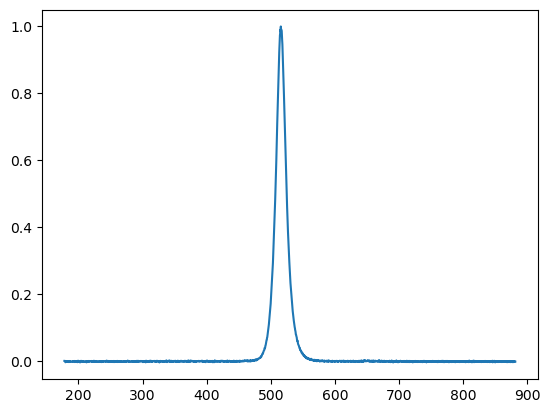

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import Abs.helper.helper as h

abs_path = '/Users/josuehernandez/Downloads/drive-download-20231113T233809Z-001/Abs_JH20_50_5000_Absorbance__0__17-18-51-994.txt'

pl_path = '/Users/josuehernandez/Downloads/drive-download-20231113T233809Z-001/PL_JH20_50_5000_Subt13__0__17-26-21-266.txt'

abs_data = pd.read_csv(abs_path, delimiter=h.detDelim(abs_path), names=('wavelength', 'intensity'))
pl_data = pd.read_csv(pl_path, delimiter=h.detDelim(pl_path), names=('wavelength', 'intensity'))

abs_x = abs_data.wavelength
abs_y = abs_data.intensity

pl_x = pl_data.wavelength
pl_y = pl_data.intensity
pl_y = pl_y / np.max(pl_y)

plt.plot(pl_x, pl_y)
# plt.xlim([460,575])
plt.show()


27.752932175200126


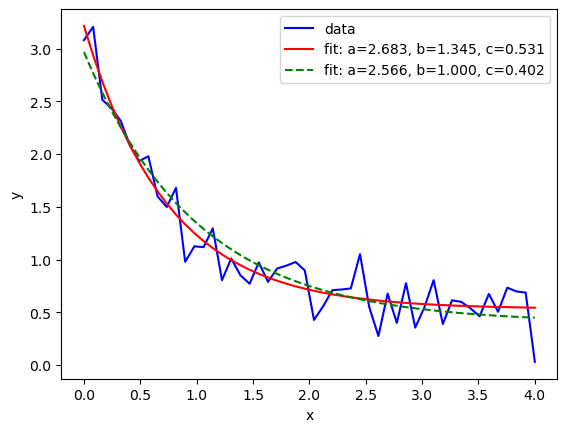

In [25]:
# x = pl_y
# y = pl_y

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')

popt, pcov = curve_fit(func, xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
plt.plot(xdata, func(xdata, *popt), 'g--', label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

print(np.linalg.cond(pcov))

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


515.95102749


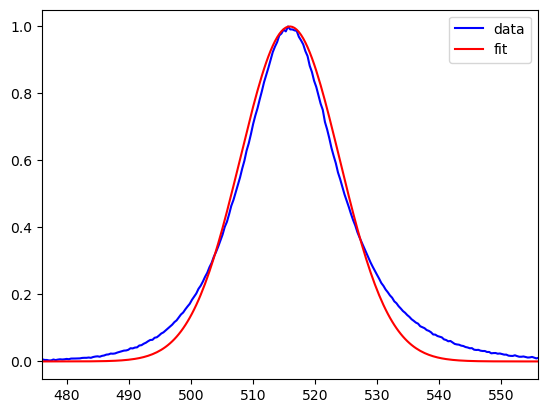

In [145]:
xdata = pl_x
ydata = pl_y

def func(x, b, s):
    return np.exp(-((x-b)**2)/(2*(s**2)))

center = pl_x[np.argmax(pl_y)]+.3
print(center)

x_range = 40
y = func(xdata, center, 8)
plt.plot(xdata, ydata, 'b-', label='data')
plt.plot(xdata, y, 'r-', label='fit')
plt.xlim([center-x_range, center+x_range])
plt.legend()
plt.show()
